In [32]:
import numpy as np
from smt.surrogate_models import KRG, RBF
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
import keras
from keras import layers
import keras_tuner

#LSTM batch normalization


In [33]:
df = pd.read_csv('Monte_Carlo_10000/training_data_bending.csv')

In [34]:
X = df[['outer_wall_thickness', 'inside_wall_side_thickness', 'inside_wall_middle_thickness', 'height', 'width', 'sigma0', 'youngs']].values
Y = df[['max_force']].values

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
#   1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

#   2. Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

#   3. Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',    # Metric to monitor
    patience=20,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Whether to restore model weights from the epoch with the best value of the monitored quantity
)

#    4. Train the model
history = model.fit(
    X_train,
    Y_train,
    epochs=1000,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/1000
4/4 [==============================] - 0s 18ms/step - loss: 950.5078 - val_loss: 902.7040
Epoch 2/1000
4/4 [==============================] - 0s 5ms/step - loss: 946.2446 - val_loss: 898.6945
Epoch 3/1000
4/4 [==============================] - 0s 4ms/step - loss: 941.9387 - val_loss: 894.6093
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 937.6818 - val_loss: 890.5310
Epoch 5/1000
4/4 [==============================] - 0s 4ms/step - loss: 933.3277 - val_loss: 886.4648
Epoch 6/1000
4/4 [==============================] - 0s 5ms/step - loss: 929.1417 - val_loss: 882.2961
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step - loss: 924.7400 - val_loss: 878.0460
Epoch 8/1000
4/4 [==============================] - 0s 4ms/step - loss: 920.2956 - val_loss: 873.7876
Epoch 9/1000
4/4 [==============================] - 0s 4ms/step - loss: 915.7380 - val_loss: 869.4028
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 911.0841

In [37]:
Y_predicted_ANN = model.predict(X_test)

1/1 [==============================] - 0s 39ms/step


In [38]:
mape_ANN = mean_absolute_percentage_error(Y_test, Y_predicted_ANN)
mape_ANN_training = mean_absolute_percentage_error(Y_train, model.predict(X_train))
print("MAPE, for ANN:", format(round(mape_ANN, 4)*100,'.2f'), "%")
print("MAPE (training), for ANN:", format(round(mape_ANN_training, 4)*100,'.2f'), "%")

3/3 [==============================] - 0s 2ms/step
MAPE, for ANN: 7.49 %
MAPE (training), for ANN: 5.62 %


3/3 [==============================] - 0s 564us/step


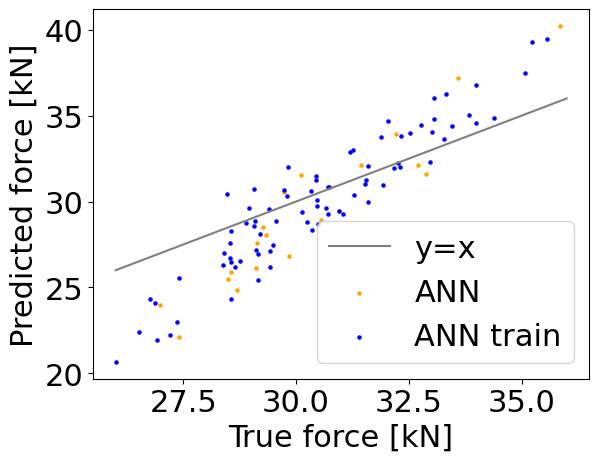

In [39]:
plt.plot([26, 36], [26, 36], label='y=x', color='gray')

plt.scatter(Y_test, Y_predicted_ANN, s=5, label='ANN', color='orange')
plt.scatter(Y_train, model.predict(X_train), s=5, label='ANN train', color='blue')

plt.xlabel('True force [kN]')
plt.ylabel('Predicted force [kN]')
plt.legend()

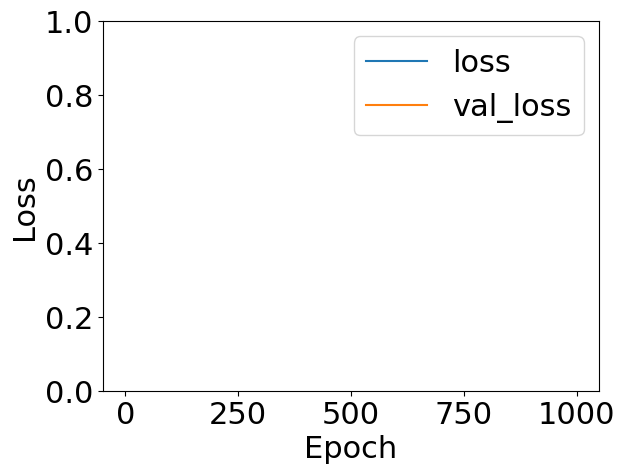

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])
plt.show()